In [23]:
import h5py
import pandas as pd
import numpy as np
from decimal import Decimal
import matplotlib.pyplot as plt
from scipy.spatial.transform import Rotation


In [24]:
%tensorboard --logdir /home/jessica/personalized_driving_toyota/

UsageError: Line magic function `%tensorboard` not found.


In [ ]:
from dataloader_comma import *
from torch.utils.data import DataLoader
from torch.nn import functional as F
import torch.nn as nn 
from torch.nn.utils.rnn import pad_sequence
def pad_collate(batch):
    meta, img, segm, angle, dist = zip(*batch)
    m_lens = [len(x) for x in meta]
    i_lens = [len(y) for y in img]
    s_lens = [len(x) for x in segm]
    a_lens = [len(y) for y in angle]
    d_lens = [len(y) for y in dist] if dist[0] != None else None 

    m_pad = pad_sequence(meta, batch_first=True, padding_value=0)
    i_pad = pad_sequence(img, batch_first=True, padding_value=0)
    segm_pad = pad_sequence(segm, batch_first=True, padding_value=0)
    a_pad = pad_sequence(angle, batch_first=True, padding_value=0)
    d_pad = pad_sequence(dist, batch_first=True, padding_value=0) if dist[0] != None else None 
    return m_pad, i_pad, segm_pad, a_pad,d_pad, m_lens, i_lens, s_lens, a_lens, d_lens


/home/jessica/.local/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
ds = CommaDataset(dataset_type="train", multitask="multitask")
dl = DataLoader(ds, batch_size=1, num_workers=10, collate_fn=pad_collate)

In [ ]:
from tqdm import tqdm 
s1 = []
for i, elem in enumerate(dl):
    meta, image_array, vego, angle, distance, m_lens, i_lens, s_lens, a_lens, d_lens = elem
    leading_zeros = 0
    for elem in distance[0]:
        if elem != 0.0:
            break
        else:
            leading_zeros+=1
    trailing_zeros = -1
    for elem in reversed(distance[0]):
        if elem != 0.0:
            break
        else:
            trailing_zeros-=1
    #print(leading_zeros, trailing_zeros)
    #print(angle[0, leading_zeros:trailing_zeros])
    if (distance == 0.0).float().mean() < 0.2 and (vego.int() == 0).float().mean() < 0.2: 
       s1.append(i)
       print(torch.concat((distance.unsqueeze(2), vego.unsqueeze(2)), axis=-1)[:, leading_zeros:trailing_zeros])


tensor([[[47.5800, 26.0475],
         [47.5000, 26.0227],
         [47.4600, 26.0024],
         [47.5400, 25.9904],
         [47.6800, 25.9808],
         [47.7200, 25.9741],
         [47.8600, 25.9586],
         [47.8600, 25.9364],
         [47.9000, 25.9252],
         [47.9400, 25.9064],
         [47.9800, 25.8897],
         [48.1200, 25.8752],
         [48.2000, 25.8747],
         [48.1600, 25.8725],
         [48.1800, 25.8656],
         [48.5200, 25.8788],
         [48.5400, 25.8820],
         [48.6000, 25.8988],
         [48.8400, 25.8938],
         [48.9200, 25.9026],
         [49.2200, 25.9238],
         [49.3200, 25.9387],
         [49.5000, 25.9488],
         [49.5800, 25.9778],
         [49.9000, 25.9957],
         [49.9600, 26.0286],
         [50.2200, 26.0574],
         [50.3200, 26.0897],
         [50.3200, 26.1313],
         [50.0800, 26.1678],
         [50.3600, 26.1881],
         [50.9200, 26.2205],
         [50.9400, 26.2693],
         [50.9200, 26.3067],
         [51.5

In [ ]:
print(s1), len(dl)

[0, 1, 4, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16, 19, 20, 21, 24, 25, 27, 29, 30, 31, 32, 33, 34, 35, 37, 38, 39, 40, 41, 42, 45, 46, 50, 52, 53, 55, 56, 57, 60, 62, 63, 64, 65, 66, 67, 68, 69, 70, 72, 73, 76, 77, 78, 81, 82, 84, 87, 88, 89, 90, 91, 92, 93, 95, 96, 97, 98, 99, 100, 103, 104, 105, 106]


(None, 108)

In [ ]:
dsv = CommaDataset(dataset_type="val", multitask="multitask")
dlv = DataLoader(dsv, batch_size=1, num_workers=10, collate_fn=pad_collate)

In [ ]:
from tqdm import tqdm 
s = []
for i, elem in enumerate(dlv):
    meta, image_array, vego, angle, distance, m_lens, i_lens, s_lens, a_lens, d_lens = elem
    leading_zeros = 0
    for elem in distance[0]:
        if elem != 0.0:
            break
        else:
            leading_zeros+=1
    trailing_zeros = -1
    for elem in reversed(distance[0]):
        if elem != 0.0:
            break
        else:
            trailing_zeros-=1
    #print(leading_zeros, trailing_zeros)
    #print(angle[0, leading_zeros:trailing_zeros])
    if (distance == 0.0).float().mean() < 0.2 and (vego.int() == 0).float().mean() < 0.2:
       s.append(i)
       print(torch.concat((distance.unsqueeze(2).int(), vego.unsqueeze(2).int()), axis=-1)[:, leading_zeros:trailing_zeros])


tensor([[[20, 22],
         [20, 22],
         [21, 22],
         [21, 22],
         [21, 22],
         [21, 22],
         [21, 22],
         [21, 22],
         [22, 23],
         [22, 23],
         [22, 23],
         [22, 23],
         [22, 23],
         [23, 23],
         [23, 23],
         [23, 23],
         [23, 23],
         [23, 23],
         [23, 23],
         [24, 23],
         [24, 24],
         [24, 24],
         [24, 24],
         [24, 24],
         [24, 24],
         [24, 24],
         [24, 24],
         [24, 24],
         [25, 24],
         [25, 24],
         [25, 24],
         [25, 25],
         [25, 25],
         [26, 25],
         [26, 25],
         [26, 25],
         [55, 25],
         [55, 25],
         [55, 25],
         [56, 25],
         [56, 25],
         [57, 25],
         [57, 25],
         [58, 25],
         [58, 25],
         [58, 26],
         [59, 26],
         [59, 26],
         [59, 26],
         [59, 26],
         [60, 26],
         [59, 26],
         [59

In [ ]:
print(s), len(dlv)

[1, 6, 9, 10, 11, 12, 14, 15]


(None, 19)

In [ ]:
dst = CommaDataset(dataset_type="test", multitask="multitask")
dlt = DataLoader(dst, batch_size=1, num_workers=10, collate_fn=pad_collate)

In [ ]:
from tqdm import tqdm 
s2 = []
for i, elem in enumerate(dlt):
    meta, image_array, vego, angle, distance, m_lens, i_lens, s_lens, a_lens, d_lens = elem
    leading_zeros = 0
    for elem in distance[0]:
        if elem != 0.0:
            break
        else:
            leading_zeros+=1
    trailing_zeros = -1
    for elem in reversed(distance[0]):
        if elem != 0.0:
            break
        else:
            trailing_zeros-=1
    #print(leading_zeros, trailing_zeros)
    #print(angle[0, leading_zeros:trailing_zeros])
    if (distance == 0.0).float().mean() < 0.2 and (vego.int() == 0).float().mean() < 0.2:
       s2.append(i)
       print(torch.concat((distance.unsqueeze(2).int(), vego.unsqueeze(2).int()), axis=-1)[:, leading_zeros:trailing_zeros])


tensor([[[61, 30],
         [61, 30],
         [61, 30],
         [61, 30],
         [61, 30],
         [61, 30],
         [62, 30],
         [62, 30],
         [61, 30],
         [61, 30],
         [61, 30],
         [61, 30],
         [61, 30],
         [60, 30],
         [60, 30],
         [60, 30],
         [60, 30],
         [60, 30],
         [60, 30],
         [60, 30],
         [60, 30],
         [59, 30],
         [59, 30],
         [59, 30],
         [59, 30],
         [58, 30],
         [58, 30],
         [58, 30],
         [58, 30],
         [57, 30],
         [56, 30],
         [56, 30],
         [56, 30],
         [55, 30],
         [55, 30],
         [55, 30],
         [54, 30],
         [54, 30],
         [53, 30],
         [53, 30],
         [52, 30],
         [52, 30],
         [51, 30],
         [51, 30],
         [51, 29],
         [51, 29],
         [51, 29],
         [51, 29],
         [51, 29],
         [51, 29],
         [50, 29],
         [50, 29],
         [50

In [ ]:
print(s2), len(dlt)

[0, 6, 8, 9, 10, 13]


(None, 18)

In [ ]:
data_path = "/data1/jessica/data/toyota/once_w_lanes_compressed_raw_small_multitask_all_train.hfd5"
data_path1 = "/data1/jessica/data/toyota/once_w_lanes_compressed_raw_small_multitask_all_train_medium_0-33.hfd5"
data_path2 = "/data1/jessica/data/toyota/once_w_lanes_compressed_raw_small_multitask_all_train_medium_34-59.hfd5"
data_path3 = "/data1/jessica/data/toyota/once_w_lanes_compressed_raw_small_multitask_all_train_medium_59-end.hfd5"
data_path4 = "/data1/jessica/data/toyota/once_w_lanes_compressed_raw_small_multitask_all_test.hfd5"
data_path5 = "/data1/jessica/data/toyota/once_w_lanes_compressed_raw_small_multitask_all_val.hfd5"
paths = [data_path, data_path1, data_path2, data_path3, data_path4, data_path5]
people_seqs = []
for data_path in paths:
            with h5py.File(data_path, "r") as f:
                for i, seq_key in enumerate(list(f.keys())):
                    person_seq = {}
                    keys_ = f[seq_key].keys()
                    for key in keys_:
                        if key == "angle": continue
                        seq = f[seq_key][key][()]#[0::subsample]
                        if key == "pos":
                            person_seq["pos"] = seq
                            seq = get_angles(seq)
                            person_seq["angle"] = seq
                            continue
                        person_seq[key] = seq
                    people_seqs.append(person_seq)

: 

: 

In [ ]:
len(people_seqs)

25

In [ ]:
for people_seq in people_seqs: 
    speeds = [-1]
    for i in range(1,len(people_seq['orig_times'])):# < 25# & people_seqs[0]['distance'] >=0
        time = people_seq['orig_times'][i]
        prev_time = people_seq['orig_times'][i-1]
        prev_time = people_seq['orig_times'][i-1]
        pos = people_seq['pos'][i][-3:]
        prev_pos = people_seq['pos'][i-1][-3:]
        speed = dist(pos, prev_pos)
        speed = speed/((time-prev_time)/60/60)
        speeds.append(speed)
    people_seq['speed'] = speeds

KeyError: 'pos'

In [ ]:
import matplotlib.pyplot as plt

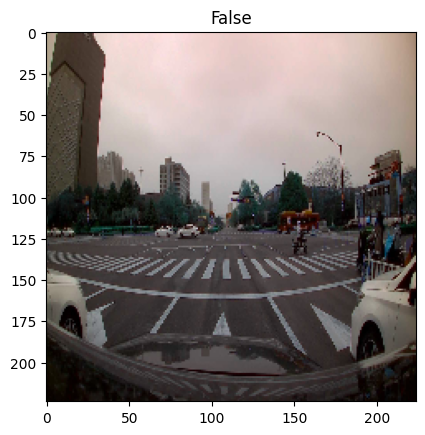

In [ ]:
for elem in people_seqs:
    for i in range(len(elem['distance'])):
        plt.imshow(elem['image_array'][i])
        plt.title(elem['distance'][i] > 0 and elem['distance'][i] < 30)
        plt.savefig(f"{i}.png")
        if i > 100: break
    #print(np.array(elem['distance'] > 0) & np.array(elem['distance'] < 30))
    break

In [ ]:
path ='/data1/jessica/data/toyota_preprocess/data/'

In [ ]:
import cv2

vidcap = cv2.VideoCapture(path + 'video/video_camera1.mp4')
success,image = vidcap.read()
count = 0
while success:
  cv2.imwrite(path+"frame%d.jpg" % count, image)     # save frame as JPEG file      
  success,image = vidcap.read()
  print('Read a new frame: ', success)
  count += 1

Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame

In [ ]:
import pandas as pd
df = pd.read_csv(path+"processed_data/logs/log_ego-vehicle.txt", sep="  | ")

/tmp/ipykernel_4104667/2166773388.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv(path+"processed_data/logs/log_ego-vehicle.txt", sep="  | ")


In [ ]:
df

,FunctionTimeStamp,gpsChainTimeMS,Lat,Lon,Ngps,Egps,CalidadGPS,posicionCocheAntenaN,posicionCocheAntenaE,Unnamed: 9,...,IMU_acc_z,IMU_gyr_x,IMU_gyr_y,IMU_gyr_z,IMU_pitch,IMU_roll,IMU_yaw,gyroBias,gpsWritingtime,posicionVolante
0,1529580070741561,0,4030.304996,320.372314,4483874.340,471231.7328,5,4483874.340,471231.7328,4483874.340,...,203,-4,59,-1,0,0,2710.19690,1.529580e+12,-10.3,NaN
1,1529580070741626,0,4030.304996,320.372314,4483874.340,471231.7328,5,4483874.340,471231.7328,4483874.340,...,203,-4,59,-1,0,0,2710.19690,1.529580e+12,-10.3,NaN
2,1529580070741667,0,4030.304996,320.372314,4483874.340,471231.7328,5,4483874.340,471231.7328,4483874.340,...,203,-4,59,-1,0,0,2710.19690,1.529580e+12,-10.3,NaN
3,1529580070741706,0,4030.304996,320.372314,4483874.340,471231.7328,5,4483874.340,471231.7328,4483874.340,...,203,-4,59,-1,0,0,2710.19690,1.529580e+12,-10.3,NaN
4,1529580070741744,0,4030.304996,320.372314,4483874.340,471231.7328,5,4483874.340,471231.7328,4483874.340,...,203,-4,59,-1,0,0,2710.19690,1.529580e+12,-10.3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246094,1529582530145000,43291500,4030.692058,320.524379,4484591.237,471019.7751,4,4484591.241,471019.7672,4484591.241,...,-30,1059,94,-1,0,0,0.00681,1.529583e+12,2.0,NaN
246095,1529582530155026,43291550,4030.692058,320.524375,4484591.235,471019.7798,4,4484591.241,471019.7673,4484591.241,...,-30,1059,94,-1,0,0,0.00681,1.529583e+12,2.0,NaN
246096,1529582530164983,43291550,4030.692058,320.524375,4484591.235,471019.7798,4,4484591.241,471019.7673,4484591.241,...,-30,1059,94,-1,0,0,0.00681,1.529583e+12,2.0,NaN
246097,1529582530174959,43291550,4030.692058,320.524375,4484591.235,471019.7798,4,4484591.241,471019.7673,4484591.241,...,-30,1059,94,-1,0,0,0.00681,1.529583e+12,2.0,NaN


In [ ]:
df2 = pd.read_csv(path+"processed_data/logs/log_camera1.txt", sep="  | ", dtype="str")

/tmp/ipykernel_4104667/2980743555.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df2 = pd.read_csv(path+"processed_data/logs/log_camera1.txt", sep="  | ", dtype="str")


In [ ]:
df2.columns=["0","1","2","3"]

In [ ]:
df2

,0,1,2,3
0,00000000001,00000000001,40927722339,40927722675
1,00000000002,00000000002,40927807818,40927807921
2,00000000003,00000000003,40927893307,40927893745
3,00000000004,00000000004,40927978788,40927979001
4,00000000005,00000000005,40928064271,40928064809
...,...,...,...,...
23839,00000023840,00000023840,42983131387,42983131443
23840,00000023841,00000023841,42983217451,42983217863
23841,00000023842,00000023842,42983303508,42983303726
23842,00000023843,00000023843,42983389575,42983390139


In [ ]:
import os 
l = os.listdir(path+'video')

In [ ]:
import rawpy
import imageio

path = 'video_camera1.raw'
raw = rawpy.imread(path)
rgb = raw.postprocess()
imageio.imsave('default.tiff', rgb)

34183

In [32]:
import h5py 
import numpy as np 
import torch

data_path = "/data1/jessica/data/toyota/train_comma_1.hfd5"
data_path2 = "/data1/jessica/data/toyota/train_comma_2.hfd5"
data_path3 = "/data1/jessica/data/toyota/test_comma_c2.hfd5"
data_path4 = "/data1/jessica/data/toyota/test_comma_c3.hfd5"

people_seqs = []
h5_file = h5py.File(data_path, "r")
keys = list(h5_file.keys())
keys.remove('10')
keys.remove('17')
keys.remove('37')
keys.remove('53')
keys.remove('55')
keys.remove('58')
h5_file2 = h5py.File(data_path2, "r")
keys2 = list(h5_file2.keys())
good_keys = [0, 1, 4, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16, 19, 20, 21, 24, 25, 27, 29, 30, 31, 32, 33, 34, 35, 37, 38, 39, 40, 41, 42, 45, 46, 50, 52, 53]#[0, 1, 4, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16, 18, 19, 20, 21, 24, 25, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 45, 46, 50, 52, 53]
gk2 = np.array([55, 56, 57, 60, 62, 64, 65, 66, 67, 68, 69, 70, 72, 73, 76, 77, 78, 81, 82, 84, 87, 88, 89, 90, 91, 92, 93, 95, 96, 97, 98, 99, 100, 103, 104, 105, 106]) - 55# np.array([55, 56, 57, 60, 62, 63, 64, 65, 66, 67, 68, 69, 70, 72, 73, 75, 76, 77, 78, 81, 82, 84, 85, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 103, 104, 105, 106]) -55
keys = list(np.array(keys)[good_keys])
keys2 = list(np.array(keys2)[gk2])[:-1]
h5_file3 = h5py.File(data_path3, "r")
keys3 = list(h5_file3.keys())
h5_file4 = h5py.File(data_path4, "r")
keys4 = list(h5_file4.keys())

In [33]:
keys2

['0',
 '1',
 '10',
 '13',
 '15',
 '17',
 '18',
 '19',
 '2',
 '20',
 '21',
 '22',
 '24',
 '25',
 '28',
 '29',
 '3',
 '32',
 '33',
 '35',
 '38',
 '39',
 '4',
 '40',
 '41',
 '42',
 '43',
 '45',
 '46',
 '47',
 '48',
 '49',
 '5',
 '52',
 '6',
 '7']

In [34]:
file = h5_file2
for seq_key in keys2:
    keys_ = h5_file2[seq_key].keys()
    for key in keys_:                        
            seq = file[seq_key][key][()]
            seq = seq if len(seq) <= 241 else seq[1::5]
            el = torch.from_numpy(np.array(seq).astype(float)).type(torch.float32)
            if el.shape[0] != 240:
                print(seq_key, key,el.shape)

In [ ]:
file = h5_file3
for seq_key in keys3:
    keys_ = h5_file3[seq_key].keys()
    for key in keys_:                        
            seq = file[seq_key][key][()]
            seq = seq if len(seq) <= 241 else seq[1::5]
            el = torch.from_numpy(np.array(seq).astype(float)).type(torch.float32)
            if el.shape[0] != 240:
                print(seq_key, key,el.shape)

In [ ]:
file = h5_file4
for seq_key in keys4:
    keys_ = h5_file4[seq_key].keys()
    for key in keys_:                        
            seq = file[seq_key][key][()]
            seq = seq if len(seq) <= 241 else seq[1::5]
            el = torch.from_numpy(np.array(seq).astype(float)).type(torch.float32)
            if el.shape[0] != 240:
                print(seq_key, key,el.shape)

In [39]:
file = h5_file
for seq_key in keys:
    keys_ = h5_file[seq_key].keys()
    for key in keys_:                        
            seq = file[seq_key][key][()]
            seq = seq if len(seq) <= 241 else seq[1::5]
            el = torch.from_numpy(np.array(seq).astype(float)).type(torch.float32)
            if el.shape[0] != 240:
                print(seq_key, key,el.shape)
            if key == "image":
                image = seq
                break
    break


In [36]:
keys_

<KeysViewHDF5 ['angle', 'brake', 'dist', 'gas', 'image', 'time', 'vEgo']>

In [42]:
image[0].shape

(224, 224, 3)

In [66]:
import matplotlib.pyplot as plt
import cv2
import torchvision.transforms as transforms

In [73]:
im = torch.tensor(image[:,0:160, :,:]).permute(0,-1,1,2)
print(im.shape)
res = transforms.functional.resize(im, size=(224, 224))
res.shape

torch.Size([240, 3, 160, 224])


torch.Size([240, 3, 224, 224])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


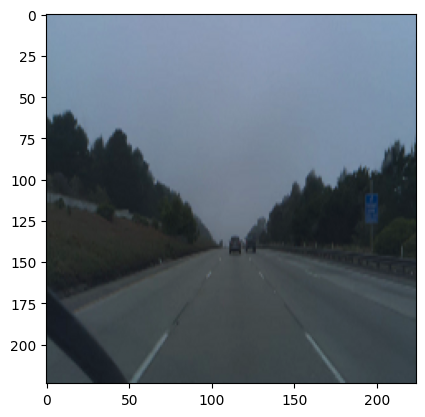

In [64]:
plt.imshow(res)

In [1]:
import pandas as pd

In [46]:
df = pd.read_csv('/home/jessica/personalized_driving_toyota/checkpoints_comma_multitask/lightning_logs/version_23/dist_multi.csv')#'/home/jessica/personalized_driving_toyota/checkpoints_comma_distance/lightning_logs/version_47/dist.csv')

In [47]:
df.columns = ['preds', 'targets']

In [48]:
np.sqrt(((df.preds-df.targets)**2).mean())

11.923036713881721

In [49]:
df = df[df.targets < 70]
df = df[df.targets != 0]


In [50]:
import numpy as np 
np.sqrt(((df.preds-df.targets)**2).mean())

5.819587511458692

In [23]:
import h5py

In [35]:
data_path = "/data1/jessica/data/toyota/test_comma_1.hfd5"
data_path2 = "/data1/jessica/data/toyota/test_comma_c2.hfd5"
data_path3 = "/data1/jessica/data/toyota/test_comma_c3.hfd5"

h5_file = h5py.File(data_path, "r")
keys = list(h5_file.keys())
good_keys = [1, 6, 9, 10, 11, 12, 14, 15]#[0, 1, 4, 6, 7, 9, 10, 11, 12, 14, 15]
keys = np.array(keys)[good_keys]
h5_file2 = h5py.File(data_path2, "r")
keys2 = list(h5_file2.keys())
h5_file3 = h5py.File(data_path3, "r")
keys3 = list(h5_file3.keys())

print(len(keys) + len(keys2)+ len(keys3))

data_path = "/data1/jessica/data/toyota/val_comma_1.hfd5"
data_path2 = "/data1/jessica/data/toyota/val_comma_c2.hfd5"
data_path3 = "/data1/jessica/data/toyota/val_comma_c3.hfd5"
h5_file = h5py.File(data_path, "r")
keys = list(h5_file.keys())
good_keys = [0, 6, 8, 9, 10, 13]#[0, 1, 4, 6, 8, 9, 10, 13, 15]
keys = np.array(keys)[good_keys]
h5_file2 = h5py.File(data_path2, "r")
keys2 = list(h5_file2.keys())
h5_file3 = h5py.File(data_path3, "r")
keys3 = list(h5_file3.keys())
print(len(keys), len(keys2), len(keys3))

22
6 9 6
